In [ ]:
!pip install pycaret[full]

#### 🚀 Classification

PyCaret’s Classification Module is a supervised machine learning module that is used for classifying elements into groups.

The goal is to predict the categorical class labels which are discrete and unordered.

Some common use cases include predicting customer default (Yes or No), predicting customer churn (customer will leave or stay), the disease found (positive or negative).

This module can be used for binary or multiclass problems.

#### 1.1 Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two required parameters: _data_ and _target_. All the other parameters are optional.

In [ ]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


PyCaret 3.0 has two API's. You can choose one of it based on your preference. The functionalities and experiment results are consistent. The two APIs are _Functional_ and _OOP_

#### Functional API

In [ ]:
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 123, imputation_type='iterative') #imputation_type='iterative'/ 'simple'

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,iterative


#### OOP API

In [ ]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data, target = 'Class variable', session_id = 123, imputation_type='iterative') #imputation_type='iterative'/ 'simple'

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,iterative


#### Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the get_metrics function. Custom metrics can be added or removed using add_metric and remove_metric function.

In [ ]:
# functional API
print("Results via Functional API")
print("---------------------------------------------------------------------------------------------------------------------")
best = compare_models()

# OOP API
print("Results via OOP API")
print("---------------------------------------------------------------------------------------------------------------------")
best = s.compare_models()

Results via Functional API
---------------------------------------------------------------------------------------------------------------------


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.9150
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0340
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0350
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2290
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0360
catboost,CatBoost Classifier,0.7410,0.7993,0.5278,0.6630,0.5851,0.4005,0.4078,2.0100
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.3090
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1280
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.1850
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0340


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Results via OOP API
---------------------------------------------------------------------------------------------------------------------


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.0510
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0350
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0330
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.2290
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0560
catboost,CatBoost Classifier,0.7410,0.7993,0.5278,0.6630,0.5851,0.4005,0.4078,2.1090
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.1820
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.1260
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.3220
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0340


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

##### Analyze Model

This function analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [ ]:
# functional API
print("Results via Functional API")
print("---------------------------------------------------------------------------------------------------------------------")
evaluate_model(best)

# OOP API
print("Results via OOP API")
print("---------------------------------------------------------------------------------------------------------------------")
s.evaluate_model(best)

Results via Functional API
---------------------------------------------------------------------------------------------------------------------


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Results via OOP API
---------------------------------------------------------------------------------------------------------------------


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

_evaluate-model_ can only be used in Notebook since it uses _ipywidget_. You can also use the plot_model function to generate plots individually.

Plots via Functional API
---------------------------------------------------------------------------------------------------------------------


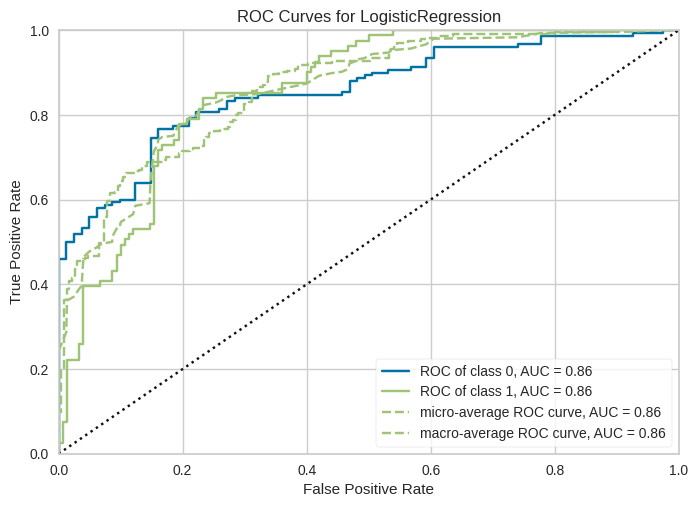

Plots via OOP API
---------------------------------------------------------------------------------------------------------------------


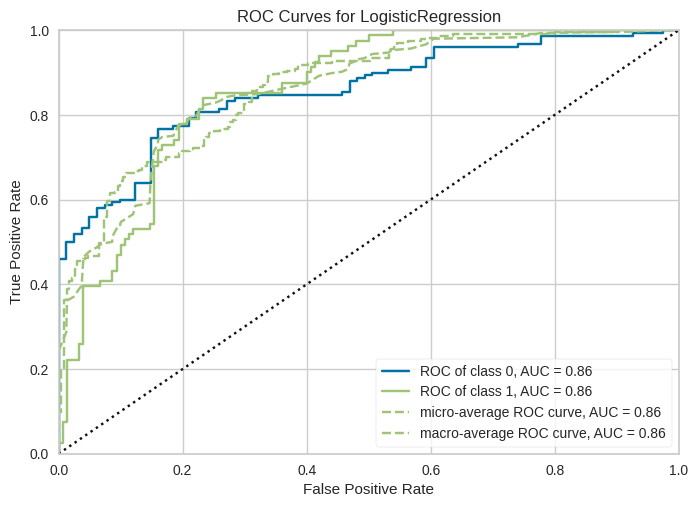

In [ ]:
# functional API
print("Plots via Functional API")
print("---------------------------------------------------------------------------------------------------------------------")
plot_model(best, plot = 'auc')

# OOP API
print("Plots via OOP API")
print("---------------------------------------------------------------------------------------------------------------------")
s.plot_model(best, plot = 'auc')

#### Predictions

This function scores the data and returns prediction_label and prediction_score probability of the predicted class. When data is None, it predicts label and score on the test set (created during the setup function).

In [ ]:
# functional API
print("Predictions via Functional API")
print("---------------------------------------------------------------------------------------------------------------------")
predict_model(best, raw_score=True)



Predictions via Functional API
---------------------------------------------------------------------------------------------------------------------


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score_0,prediction_score_1
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8037,0.1963
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648,0.0352
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9394,0.0606
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7999,0.2001
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.3607,0.6393
...,...,...,...,...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.400002,0.698,27,0,0,0.8002,0.1998
7,10,115,0,0,0,35.299999,0.134,29,0,1,0.3770,0.6230
298,14,100,78,25,184,36.599998,0.412,46,1,0,0.5984,0.4016
341,1,95,74,21,73,25.900000,0.673,36,0,0,0.9244,0.0756


In [ ]:
# OOP API
print("Predictions via OOP API")
print("---------------------------------------------------------------------------------------------------------------------")
s.predict_model(best, raw_score=True)

Predictions via OOP API
---------------------------------------------------------------------------------------------------------------------


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score_0,prediction_score_1
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8037,0.1963
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648,0.0352
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9394,0.0606
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7999,0.2001
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.3607,0.6393
...,...,...,...,...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.400002,0.698,27,0,0,0.8002,0.1998
7,10,115,0,0,0,35.299999,0.134,29,0,1,0.3770,0.6230
298,14,100,78,25,184,36.599998,0.412,46,1,0,0.5984,0.4016
341,1,95,74,21,73,25.900000,0.673,36,0,0,0.9244,0.0756


In [ ]:
# functional API
print("Save Model via Functional API")
print("---------------------------------------------------------------------------------------------------------------------")
save_model(best, 'my_best_pipeline_functional')

# OOP API
print("Predictions via OOP API")
print("---------------------------------------------------------------------------------------------------------------------")
s.save_model(best, 'my_best_pipeline_oop')

Save Model via Functional API
---------------------------------------------------------------------------------------------------------------------
Transformation Pipeline and Model Successfully Saved
Predictions via OOP API
---------------------------------------------------------------------------------------------------------------------
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('iterative_imputer',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=IterativeImputer(add_indicator=False,
                                                                  cat_estimator=LGBMClassifier(boosting_type='gbdt',
                                                                                               class_weight=None,
                                                                                               colsample_bytree=1.0,
                                                                                               importance_type='split',
                                                                                               learning_rate=0.1,
                                                                                               max_depth=-1,
                                                                              

In [ ]:
import gradio as gr
import pandas as pd

def predict_diabetes(pregnant, glucose, bp, skin, insulin, bmi, dpf, age):
    # Create input dataframe
    input_data = pd.DataFrame({
        'Number of times pregnant': [pregnant],
        'Plasma glucose concentration a 2 hours in an oral glucose tolerance test': [glucose],
        'Diastolic blood pressure (mm Hg)': [bp],
        'Triceps skin fold thickness (mm)': [skin],
        '2-Hour serum insulin (mu U/ml)': [insulin],
        'Body mass index (weight in kg/(height in m)^2)': [bmi],
        'Diabetes pedigree function': [dpf],
        'Age (years)': [age]
    })

    # Make prediction
    prediction = s.predict_model(best, data=input_data)
    prob = prediction.iloc[0]['prediction_score']
    result = "Positive (Has Diabetes)" if prediction.iloc[0]['prediction_label'] == 1 else "Negative (No Diabetes)"

    return f"{result} with probability: {prob:.2f}"

# Create Gradio interface
demo = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Number(label="Number of times pregnant"),
        gr.Number(label="Plasma glucose concentration"),
        gr.Number(label="Diastolic blood pressure (mm Hg)"),
        gr.Number(label="Triceps skin fold thickness (mm)"),
        gr.Number(label="2-Hour serum insulin (mu U/ml)"),
        gr.Number(label="Body mass index"),
        gr.Number(label="Diabetes pedigree function"),
        gr.Number(label="Age (years)")
    ],
    outputs=gr.Text(label="Prediction"),
    title="Diabetes Prediction",
    description="Enter patient information to predict diabetes risk"
)

demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6b4e2229f8b37f711c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
